The objective of the following article is to obtain a step-by-step guide on building the `Prediction intervals in forecasting models` using `Mlforecast`.

During this walkthrough, we will become familiar with the main `MlForecast` class and some relevant methods such as `mlforecast.fit`, `mlforecast.predict` and `mlforecast.cross_validation` in other.

Let's start!!!

<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1.	[Introduction](#1)
2.	[Prediction intervals in forecasting Model](#2)
3.	[Installing Mlforecast](#3)
4.	[Loading libraries and data](#4)
5.	[Explore Data with the plot method](#5)
6.	[Split the data into training and testing](#6)
7.	[Implementation of model with MLForecast](#7)
8. [References](#8)

# **1. Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0)

The target of our prediction is something unknown (otherwise we wouldn't be making a prediction), so we can think of it as a random variable. For example, the total sales for the next month could have different possible values, and we won't know what the exact value will be until we get the actual sales at the end of the month. Until next month's sales are known, this is a random amount.

By the time the next month draws near, we usually have a pretty good idea of possible sales values. However, if we are forecasting sales for the same month next year, the possible values can vary much more. In most forecasting cases, the variability associated with what we are forecasting reduces as we get closer to the event. In other words, the further back in time we make the prediction, the more uncertainty there is.

We can imagine many possible future scenarios, each yielding a different value for what we are trying to forecast.

When we obtain a forecast, we are estimating the middle of the range of possible values the random variable could take. Often, a forecast is accompanied by a prediction interval giving a range of values the random variable could take with relatively high probability. For example, a 95% prediction interval contains a range of values which should include the actual future value with probability 95%.

Rather than plotting individual possible futures , we usually show these prediction intervals instead.

When we generate a forecast, we usually produce a single value known as the point forecast. This value, however, doesn’t tell us anything about the uncertainty associated with the forecast. To have a measure of this uncertainty, we need prediction intervals.

A prediction interval is a range of values that the forecast can take with a given probability. Hence, a 95% prediction interval should contain a range of values that include the actual future value with probability 95%. Probabilistic forecasting aims to generate the full forecast distribution. Point forecasting, on the other hand, usually returns the mean or the median or said distribution. However, in real-world scenarios, it is better to forecast not only the most probable future outcome, but many alternative outcomes as well.

The problem is that some timeseries models provide forecast distributions, but some other ones only provide point forecasts. How can we then estimate the uncertainty of predictions?

# **2. Forecasts and prediction intervals** <a class="anchor" id="2"></a>

[Table of Contents](#0)

There are at least four sources of uncertainty in forecasting using time series models:

1. The random error term;
2. The parameter estimates;
3. The choice of model for the historical data;
4. The continuation of the historical data generating process into the future.

When we produce prediction intervals for time series models, we generally only take into account the first of these sources of uncertainty. It would be possible to account for 2 and 3 using simulations, but that is almost never done because it would take too much time to compute. As computing speeds increase, it might become a viable approach in the future.

Even if we ignore the model uncertainty and the DGP uncertainty (sources 3 and 4), and just try to allow for parameter uncertainty as well as the random error term (sources 1 and 2), there are no closed form solutions apart from some simple special cases. see full article [Rob J Hyndman](https://robjhyndman.com/hyndsight/narrow-pi/)


## **2.1 Forecast distributions**
We use forecast distributions to express the uncertainty in our predictions. These probability distributions describe the probability of observing different future values using the fitted model. The point forecast corresponds to the mean of this distribution. Most time series models generate forecasts that follow a normal distribution, which implies that we assume that possible future values follow a normal distribution. However, later in this section we will look at some alternatives to normal distributions.

### **Importance of Confidence Interval Prediction in Time Series:**

1. Uncertainty Estimation: The confidence interval provides a measure of the uncertainty associated with time series predictions. It enables variability and the range of possible future values to be quantified, which is essential for making informed decisions.

2. Precision evaluation: By having a confidence interval, the precision of the predictions can be evaluated. If the interval is narrow, it indicates that the forecast is more accurate and reliable. On the other hand, if the interval is wide, it indicates greater uncertainty and less precision in the predictions.

3. Risk management: The confidence interval helps in risk management by providing information about possible future scenarios. It allows identifying the ranges in which the real values could be located and making decisions based on those possible scenarios.

4. Effective communication: The confidence interval is a useful tool for communicating predictions clearly and accurately. It allows the variability and uncertainty associated with the predictions to be conveyed to the stakeholders, avoiding a wrong or overly optimistic interpretation of the results.

Therefore, confidence interval prediction in time series is essential to understand and manage uncertainty, assess the accuracy of predictions, and make informed decisions based on possible future scenarios.

## **2.2 Prediction intervals**

A prediction interval gives us a range in which we expect $y_t$ to lie with a specified probability. For example, if we assume that the distribution of future observations follows a normal distribution, a 95% prediction interval for the forecast of step h would be represented by the range 

$$\hat{y}_{T+h|T} \pm 1.96 \hat\sigma_h,$$

Where $\hat\sigma_h$ is an estimate of the standard deviation of the h -step forecast distribution.

More generally, a prediction interval can be written as

$$\hat{y}_{T+h|T} \pm c \hat\sigma_h$$

In this context, the term "multiplier c" is associated with the probability of coverage. In this article, intervals of 80% and 95% are typically calculated, but any other percentage can be used. The table below shows the values of c corresponding to different coverage probabilities, assuming a normal forecast distribution.

|Percentage	|Multiplier|
|-----------|----------|
|50|0.67|
|55	|0.76|
|60	|0.84|
|65	|0.93|
|70	|1.04|
|75	|1.15|
|80	|1.28|
|85	|1.44|
|90	|1.64|
|95	|1.96|
|96	|2.05|
|97	|2.17|
|98	|2.33|
|99	|2.58|

Prediction intervals are valuable because they reflect the uncertainty in the predictions. If we only generate point forecasts, we cannot assess how accurate those forecasts are. However, by providing prediction intervals, the amount of uncertainty associated with each forecast becomes apparent. For this reason, point forecasts may lack significant value without the inclusion of corresponding forecast intervals.


## **2.3 One-step prediction intervals**

When making a prediction for a future step, it is possible to estimate the standard deviation of the forecast distribution using the standard deviation of the residuals, which is calculated by

\begin{equation}
  \hat{\sigma} = \sqrt{\frac{1}{T-K-M}\sum_{t=1}^T e_t^2}, \tag{1}
\end{equation}

where $K$ is the number of parameters estimated in the forecasting method, and $M$ is the number of missing values in the residuals. (For example, $M=1$ for a naive forecast, because we can’t forecast the first observation.)

## **2.4. Multi-step prediction intervals** 

A typical feature of forecast intervals is that they tend to increase in length as the forecast horizon lengthens. As we move further out in time, there is greater uncertainty associated with the prediction, resulting in wider prediction intervals. In general, σh tends to increase as h increases (although there are some nonlinear forecasting methods that do not follow this property).

To generate a prediction interval, it is necessary to have an estimate of σh. As mentioned above, for one-step forecasts (h=1), equation (1) provides a good estimate of the standard deviation of the forecast, σ1. However, for multi-step forecasts, a more complex calculation method is required. These calculations assume that the residuals are uncorrelated with each other.

## Benchmark methods
For the four benchmark methods, it is possible to mathematically derive the forecast standard deviation under the assumption of uncorrelated residuals. If $\hat{\sigma}_h$ denotes the standard deviation of the $h$ -step forecast distribution, and $\hat{\sigma}$ is the residual standard deviation given by (1), then we can use the expressions shown in next Table. Note that when $h=1$ and  $T$ is large, these all give the same approximate value $\hat{\sigma}$.

|Method|h-step forecast standard deviation|
|------|----------------------------------|
|Mean forecasts|$\hat\sigma_h = \hat\sigma\sqrt{1 + 1/T}$|
|Naïve forecasts|$\hat\sigma_h = \hat\sigma\sqrt{h}$|
|Seasonal naïve forecasts|$\hat\sigma_h = \hat\sigma\sqrt{k+1}$|
|Drift forecasts|$\hat\sigma_h = \hat\sigma\sqrt{h(1+h/T)}$|

Note that when $h=1$ and $T$ is large, these all give the same approximate value $\hat{\sigma}$.

## **2.5 Prediction intervals from bootstrapped residuals**

When a normal distribution for the residuals is an unreasonable assumption, one alternative is to use bootstrapping, which only assumes that the residuals are uncorrelated with constant variance. We will illustrate the procedure using a naïve forecasting method.

A one-step forecast error is defined as $e_t = y_t - \hat{y}_{t|t-1}$. For a naïve forecasting method, \hat{y}_{t|t-1} = y_{t-1}, so we can rewrite this as
$$y_t = y_{t-1} + e_t.$$

Assuming future errors will be similar to past errors, when $t>T$ we can replace $e_{t}$ by sampling from the collection of errors we have seen in the past (i.e., the residuals). So we can simulate the next observation of a time series using

$$y^*_{T+1} = y_{T} + e^*_{T+1}$$

where $e^*_{T+1}$ is a randomly sampled error from the past, and $y^*_{T+1}$  is the possible future value that would arise if that particular error value occurred. We use We use a * to indicate that this is not the observed $y_{T+1}$ value, but one possible future that could occur. Adding the new simulated observation to our data set, we can repeat the process to obtain 

$$y^*_{T+2} = y_{T+1}^* + e^*_{T+2},$$

where $e^*_{T+2}$ is another draw from the collection of residuals. Continuing in this way, we can simulate an entire set of future values for our time series.

## **2.6 Conformal Prediction**

Multi-quantile losses and statistical models can provide provide prediction intervals, but the problem is that these are uncalibrated, meaning that the actual frequency of observations falling within the interval does not align with the confidence level associated with it. For example, a calibrated 95% prediction interval should contain the true value 95% of the time in repeated sampling. An uncalibrated 95% prediction interval, on the other hand, might contain the true value only 80% of the time, or perhaps 99% of the time. In the first case, the interval is too narrow and underestimates the uncertainty, while in the second case, it is too wide and overestimates the uncertainty.

Statistical methods also assume normality. Here, we talk about another method called conformal prediction that doesn’t require any distributional assumptions.

Conformal prediction intervals use cross-validation on a point forecaster model to generate the intervals. This means that no prior probabilities are needed, and the output is well-calibrated. No additional training is needed, and the model is treated as a black box. The approach is compatible with any model

[MlForecast](https://github.com/nixtla/mlforecast) now supports Conformal Prediction on all available models.

# **3. Installing Statsforecast** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

* using pip:

    - `pip install mlforecast`

* Specific version

    If you want a specific version you can include a filter, for example:

    - `pip install "mlforecast==0.3.0"` to install the 0.3.0 version
    - `pip install "mlforecast<0.4.0"` to install any version prior to 0.4.0

* using with conda:

    - `conda install -c conda-forge mlforecast`

* Specific version

    If you want a specific version you can include a filter, for example: 

    - `conda install -c conda-forge "mlforecast==0.3.0"` to install the 0.3.0 version
    - `conda install -c conda-forge "mlforecast<0.4.0"` to install any version prior to 0.4.0

¡Warning!

We are constantly updating StatsForecast, so we suggest fixing the version to avoid issues. 

`pip install statsforecast=="1.0.0"`

# **4. Loading libraries and data** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats

# Handling and processing of Data for Date (time)
# ==============================================================================
import datetime
import time
from datetime import datetime, timedelta

# 
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose 
# 
# ==============================================================================
from utilsforecast.plotting import plot_series


In [2]:
from mlforecast import MLForecast
import xgboost as xgb

# 
# ==============================================================================
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from window_ops.ewm import ewm_mean
from mlforecast.target_transforms import Differences

from mlforecast.utils import PredictionIntervals

In [3]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#008080',  # #212946
    'axes.facecolor': '#008080',
    'savefig.facecolor': '#008080',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#000000',  #2A3459
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## **4.1 Read Data**

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/nyc_taxi.csv",parse_dates=["timestamp"] )
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


The input to MlForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [8]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,2014-07-01 00:00:00,10844,1
1,2014-07-01 00:30:00,8127,1
2,2014-07-01 01:00:00,6210,1
3,2014-07-01 01:30:00,4656,1
4,2014-07-01 02:00:00,3820,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         10320 non-null  datetime64[ns]
 1   y          10320 non-null  int64         
 2   unique_id  10320 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 242.0+ KB


# **5. Explore Data with the plot method** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

Plot some series using the plot method from the StatsForecast class. This method prints 8 random series from the dataset and is useful for basic EDA.

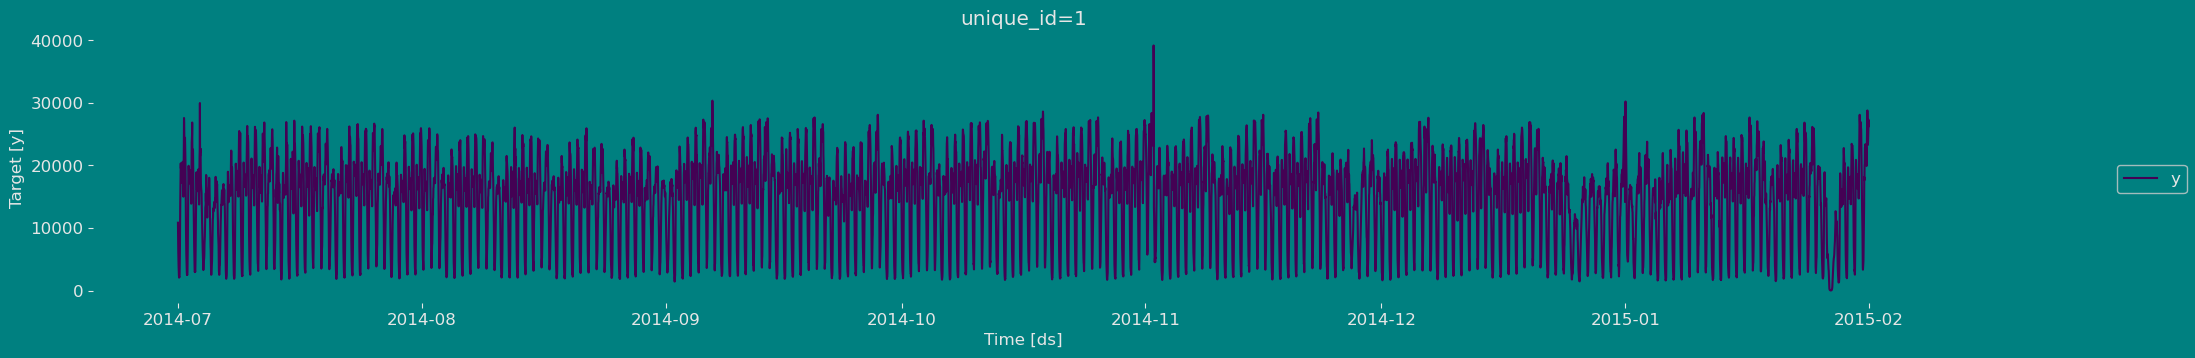

In [11]:
plot_series(df)

## **5.1 The Augmented Dickey-Fuller Test**
An Augmented Dickey-Fuller (ADF) test is a type of statistical test that determines whether a unit root is present in time series data. Unit roots can cause unpredictable results in time series analysis. A null hypothesis is formed in the unit root test to determine how strongly time series data is affected by a trend. By accepting the null hypothesis, we accept the evidence that the time series data is not stationary. By rejecting the null hypothesis or accepting the alternative hypothesis, we accept the evidence that the time series data is generated by a stationary process. This process is also known as stationary trend. The values of the ADF test statistic are negative. Lower ADF values indicate a stronger rejection of the null hypothesis.

Augmented Dickey-Fuller Test is a common statistical test used to test whether a given time series is stationary or not. We can achieve this by defining the null and alternate hypothesis.

- Null Hypothesis: Time Series is non-stationary. It gives a time-dependent trend.
- Alternate Hypothesis: Time Series is stationary. In another term, the series doesn’t depend on time.

- ADF or t Statistic < critical values: Reject the null hypothesis, time series is stationary.
- ADF or t Statistic > critical values: Failed to reject the null hypothesis, time series is non-stationary.

In [13]:
def snake_case(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [14]:
snake_case(df["y"],'Ads')

Dickey-Fuller test results for columns: Ads
Test Statistic                -1.076452e+01
p-value                        2.472132e-19
No Lags Used                   3.900000e+01
Number of observations used    1.028000e+04
Critical Value (1%)           -3.430986e+00
Critical Value (5%)           -2.861821e+00
Critical Value (10%)          -2.566920e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


## **5.2 Autocorrelation plots**

### **Autocorrelation Function**

**Definition 1.** Let $\{x_t;1 ≤ t ≤ n\}$ be a time series sample of size n from $\{X_t\}$.
1. $\bar x = \sum_{t=1}^n \frac{x_t}{n}$ is called the sample mean of $\{X_t\}$.
2. $c_k =\sum_{t=1}^{n−k} (x_{t+k}- \bar x)(x_t−\bar x)/n$ is known as the sample autocovariance function of $\{X_t\}$.
3. $r_k = c_k /c_0$ is said to be the sample autocorrelation function of $\{X_t\}$. 

Note the following remarks about this definition:
 
* Like most literature, this guide uses ACF to denote the sample autocorrelation function as well as the autocorrelation function. What is denoted by ACF can easily be identified in context.

* Clearly c0 is the sample variance of $\{X_t\}$. Besides, $r_0 = c_0/c_0 = 1$ and for any integer $k, |r_k| ≤ 1$.

* When we compute the ACF of any sample series with a fixed length $n$, we cannot put too much confidence in the values of $r_k$ for large k’s, since fewer pairs of $(x_{t +k }, x_t )$ are available for calculating $r_k$ as $k$ is large. One rule of thumb is not to estimate $r_k$ for $k > n/3$, and another is $n ≥ 50, k ≤ n/4$. In any case, it is always a good idea to be careful.

* We also compute the ACF of a nonstationary time series sample by Definition 1. In this case, however, the ACF or $r_k$ very slowly or hardly tapers off as $k$ increases.

* Plotting the ACF $(r_k)$ against lag $k$ is easy but very helpful in analyzing time series sample. Such an ACF plot is known as a correlogram.

* If $\{X_t\}$ is stationary with $E(X_t)=0$ and $\rho_k =0$ for all $k \neq 0$,thatis,itisa white noise series, then the sampling distribution of $r_k$ is asymptotically normal with the mean 0 and the variance of $1/n$. Hence, there is about 95% chance that $r_k$ falls in the interval $[−1.96/√n, 1.96/√n]$.

Now we can give a summary that (1) if the time series plot of a time series clearly shows a trend or/and seasonality, it is surely nonstationary; (2) if the ACF $r_k$ very slowly or hardly tapers off as lag $k$ increases, the time series should also be nonstationary.

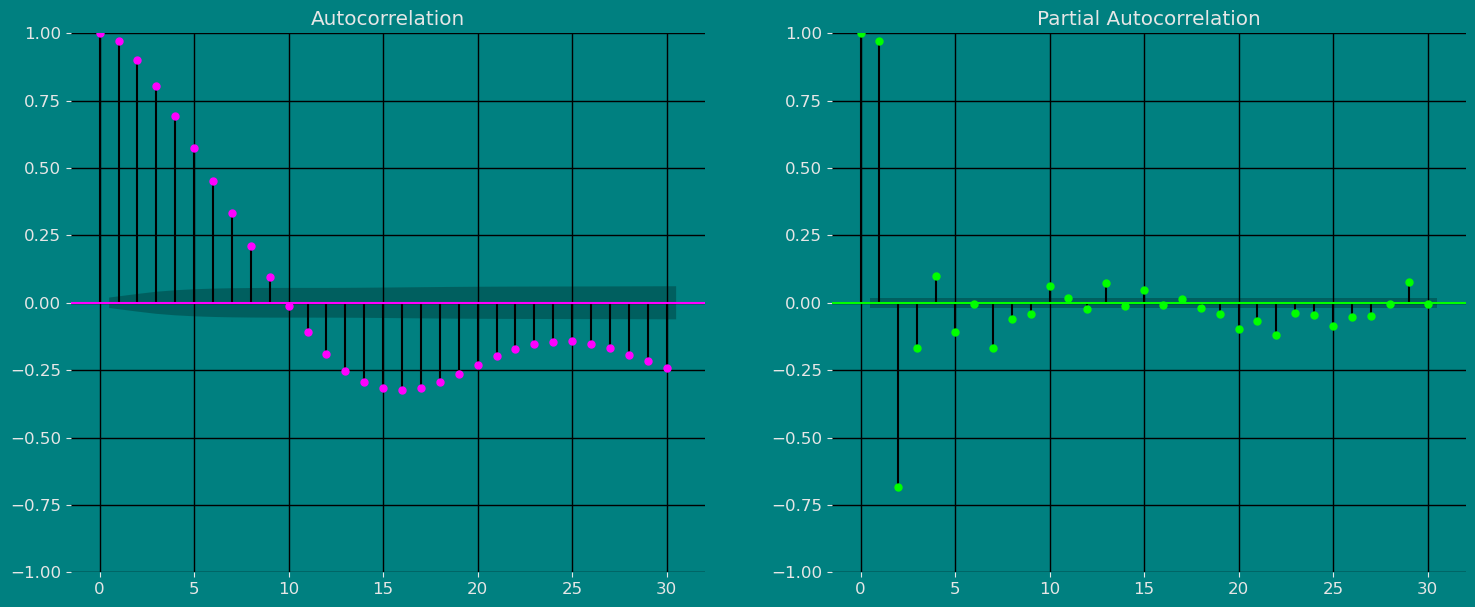

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

## **5.3 Decomposition of the time series**

How to decompose a time series and why?

In time series analysis to forecast new values, it is very important to know past data. More formally, we can say that it is very important to know the patterns that values follow over time. There can be many reasons that cause our forecast values to fall in the wrong direction. Basically, a time series consists of four components. The variation of those components causes the change in the pattern of the time series. These components are:

* **Level:** This is the primary value that averages over time.
* **Trend:** The trend is the value that causes increasing or decreasing patterns in a time series.
* **Seasonality:** This is a cyclical event that occurs in a time series for a short time and causes short-term increasing or decreasing patterns in a time series.
* **Residual/Noise:** These are the random variations in the time series.

Combining these components over time leads to the formation of a time series. Most time series consist of level and noise/residual and trend or seasonality are optional values.

If seasonality and trend are part of the time series, then there will be effects on the forecast value. As the pattern of the forecasted time series may be different from the previous time series.

The combination of the components in time series can be of two types:
* Additive
* multiplicative

Additive time series

If the components of the time series are added to make the time series. Then the time series is called the additive time series. By visualization, we can say that the time series is additive if the increasing or decreasing pattern of the time series is similar throughout the series. The mathematical function of any additive time series can be represented by:
$$y(t) = level + Trend + seasonality + noise$$

## Multiplicative time series

If the components of the time series are multiplicative together, then the time series is called a multiplicative time series. For visualization, if the time series is having exponential growth or decline with time, then the time series can be considered as the multiplicative time series. The mathematical function of the multiplicative time series can be represented as.

$$y(t) = Level * Trend * seasonality * Noise$$

### Additive

In [ ]:
a = seasonal_decompose(df["y"], model = "additive", period=24)
a.plot();

### Multiplicative

In [ ]:
b = seasonal_decompose(df["y"], model = "Multiplicative", period=24)
b.plot();

# **6. Split the data into training and testing** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our model.
2. Data to test our model

For the test data we will use the last 500 hours to test and evaluate the performance of our model.

In [ ]:
train = df[df.ds<='2015-01-21 13:30:00'] 
test = df[df.ds>'2015-01-21 13:30:00'] 

In [ ]:
train.shape, test.shape

Now let's plot the training data and the test data.

In [ ]:
plot_series(train,test)


In [ ]:
fig, ax = plt.subplots(figsize=(18, 7))
sns.lineplot(train,x="ds", y="y", label="Train", linestyle="--",linewidth=2)
sns.lineplot(test, x="ds", y="y", label="Test", linewidth=2, color="yellow")
#ax.axvline('2017-09-20', color='red', ls='--')
plt.title("");
plt.show()

# **7. Modeling with MLForecast** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


## **7.2 Building Model**

We define the model that we want to use, for our example we are going to use the `XGBoost model`.

In [ ]:
model1 = [xgb.XGBRegressor()]

We can use the `MLForecast.preprocess` method to explore different transformations. It looks like these series have a strong seasonality on the hour of the day, so we can subtract the value from the same hour in the previous day to remove it. This can be done with the `mlforecast.target_transforms.Differences` transformer, which we pass through target_transforms.

We fit the models by instantiating a new `MlForecast` object with the following parameters:

* `models:` a list of models. Select the models you want from models and import them.

* `freq:` a string indicating the frequency of the data. (See [panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).)

* `lags:` Lags of the target to uses as feature.

* `lag_transforms:` Mapping of target lags to their transformations.

* `date_features:` Features computed from the dates. Can be `pandas` date attributes or functions that will take the dates as input.

* `differences:` Differences to take of the target before computing the features. These are restored at the forecasting step.

* `num_threads:` Number of threads to use when computing the features.

* `target_transforms:` Transformations that will be applied to the target computing the features and restored after the forecasting step.

Any settings are passed into the constructor. Then you call its fit method and pass in the historical data frame.

In [ ]:
mlf = MLForecast(models=model1,
                 freq='30min', 
                 target_transforms=[Differences([1])],
                 ) 

It is important to take into account when we use the parameter `target_transforms=[Differences([1])]` in case the series is stationary we can use a difference, or in the case that the series is not stationary, we can use more than one difference so that the series is constant over time, that is, that it is constant in mean and in variance.

In [ ]:
prep = mlf.preprocess(df)
prep

This has subtacted the lag 1 from each value, we can see what our series look like now.

In [ ]:
prep[['y']].plot( linewidth=2)

## **7.3 Adding features**

### Lags
Looks like the seasonality is gone, we can now try adding some lag features.

In [ ]:
mlf = MLForecast(models=model1,
                 freq='30min',  
                 lags=[1,24],
                 target_transforms=[Differences([1])],
                 ) 

In [ ]:
prep = mlf.preprocess(df)
prep

In [ ]:
prep.drop(columns=['unique_id', 'ds']).corr()['y']

## **7.4 Lag transforms**
Lag transforms are defined as a dictionary where the keys are the lags and the values are lists of functions that transform an array. These must be [numba](http://numba.pydata.org) jitted functions (so that computing the features doesn’t become a bottleneck). There are some implemented in the [window-ops package](https://github.com/jmoralez/window_ops) but you can also implement your own.

If the function takes two or more arguments you can either:

* supply a tuple (tfm_func, arg1, arg2, …)
* define a new function fixing the arguments

In [ ]:
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

In [ ]:
mlf = MLForecast(models=model1,
                 freq='30min',  
                 lags=[1,24],
                 lag_transforms={1: [expanding_mean],24: [(rolling_mean, 7)] },
                 target_transforms=[Differences([1])],
                 ) 

In [ ]:
prep = mlf.preprocess(df)
prep

You can see that both approaches get to the same result, you can use whichever one you feel most comfortable with.

## **7.5 Date features**
If your time column is made of timestamps then it might make sense to extract features like week, dayofweek, quarter, etc. You can do that by passing a list of strings with pandas time/date components. You can also pass functions that will take the time column as input, as we’ll show here.

In [ ]:
mlf = MLForecast(models=model1,
                 freq='30min', 
                 lags=[1,24],
                 lag_transforms={1: [expanding_mean],24: [(rolling_mean, 7)] },
                 target_transforms=[Differences([1])],
                 date_features=["year", "month", "day", "hour"]) # Seasonal data

In [ ]:
prep = mlf.preprocess(df)
prep

## **7.6 Fit the Model**

The fit method uses the following parameters:
|Parameters |Type	|Default	|Details|
|-----------|-------|-----------|-------|
|df|	DataFrame|		|Series data in long format.|
|id_col|	str	|unique_id|	Column that identifies each serie|.
|time_col	|str	|ds	|Column that identifies each timestep, its values can be timestamps or integers.
|target_col	|str	|y	|Column that contains the target.
|static_features	|typing.Optional[typing.List[str]]|	None	|Names of the features that are static and will be repeated when forecasting. If None, will consider all columns (except id_col and time_col) as static.|
|dropna	|bool	|True	|Drop rows with missing values produced by the transformations.|
|keep_last_n	|typing.Optional[int]	|None	|Keep only these many records from each serie for the forecasting step. Can save time and memory if your features allow it.|
|max_horizon	|typing.Optional[int]	|None	|
|prediction_intervals	|typing.Optional[mlforecast.utils.PredictionIntervals]	|None	|Configuration to calibrate prediction intervals (Conformal Prediction).|
|fitted	|bool	|False	|Save in-sample predictions.|
|data	|typing.Optional[pandas.core.frame.DataFrame]	|None	|Series data in long format. This argument has been replaced by df and will be removed in a later release.|

In [ ]:
# fit the models
mlf.fit(df,  
 fitted=True, 
prediction_intervals=PredictionIntervals(n_windows=5, window_size=30, method="conformal_distribution" )  )

Let's see the results of our model in this case the `XGBoost model`. We can observe it with the following instruction:

Let us now visualize the fitted values of our models.

In [ ]:
result=mlf.forecast_fitted_values()
result=result.set_index("unique_id")
result

In [ ]:
from statsmodels.stats.diagnostic import normal_ad
from scipy import stats

sw_result = stats.shapiro(result["XGBRegressor"])
ad_result = normal_ad(np.array(result["XGBRegressor"]), axis=0)
dag_result = stats.normaltest(result["XGBRegressor"], axis=0, nan_policy='propagate')

It's important to note that we can only use this method if we assume that the residuals of our validation predictions are normally distributed. To see if this is the case, we will use a PP-plot and test its normality with the Anderson-Darling, Kolmogorov-Smirnov, and D’Agostino K^2 tests.

The PP-plot(Probability-to-Probability) plots the data sample against the normal distribution plot in such a way that if normally distributed, the data points will form a straight line.

The three normality tests determine how likely a data sample is from a normally distributed population using p-values. The null hypothesis for each test is that "the sample came from a normally distributed population". This means that if the resulting p-values are below a chosen alpha value, then the null hypothesis is rejected. Thus there is evidence to suggest that the data comes from a non-normal distribution. For this article, we will use an Alpha value of 0.01.

In [ ]:
result=mlf.forecast_fitted_values()
fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
result["XGBRegressor"].plot(ax=axs[0,0])
axs[0,0].set_title("Residuals model");

# plot
sns.distplot(result["XGBRegressor"], ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(result["XGBRegressor"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')
axs[1,0].annotate("SW p-val: {:.4f}".format(sw_result[1]), xy=(0.05,0.9), xycoords='axes fraction', fontsize=15,
            bbox=dict(boxstyle="round", fc="none", ec="gray", pad=0.6))

axs[1,0].annotate("AD p-val: {:.4f}".format(ad_result[1]), xy=(0.05,0.8), xycoords='axes fraction', fontsize=15,
            bbox=dict(boxstyle="round", fc="none", ec="gray", pad=0.6))

axs[1,0].annotate("DAG p-val: {:.4f}".format(dag_result[1]), xy=(0.05,0.7), xycoords='axes fraction', fontsize=15,
            bbox=dict(boxstyle="round", fc="none", ec="gray", pad=0.6))
# plot
plot_acf(result["XGBRegressor"],  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

## **7.6 Predict method with prediction intervals**

To generate forecasts use the predict method.

The predict method takes several arguments.: 

|Parameters |Type	|Default	|Details|
|-----------|-------|-----------|-------|
|h	|int	|	|Number of periods to predict.|
|dynamic_dfs	|typing.Optional[typing.List[pandas.core.frame.DataFrame]]	|None	|Future values of the dynamic features, e.g. prices.
|before_predict_callback	|typing.Optional[typing.Callable]	|None	|Function to call on the features before computing the predictions. This function will take the input dataframe that will be passed to the model for predicting and should return a dataframe with the same structure. The series identifier is on the index.
|after_predict_callback	|typing.Optional[typing.Callable]	|None	|Function to call on the predictions before updating the targets. This function will take a pandas Series with the predictions and should return another one with the same structure. The series identifier is on the index.
|new_df	|typing.Optional[pandas.core.frame.DataFrame]|	None	|Series data of new observations for which forecasts are to be generated. This dataframe should have the same structure as the one used to fit the model, including any features and time series data. If new_df is not None, the method will generate forecasts for the new observations.
|level	|typing.Optional[typing.List[typing.Union[int, float]]]|	None	|Confidence levels between 0 and 100 for prediction intervals.
|X_df	|typing.Optional[pandas.core.frame.DataFrame]	|None	|Dataframe with the future exogenous features. Should have the id column and the time column.
|ids	|typing.Optional[typing.List[str]]	|None	|List with subset of ids seen during training for which the forecasts should be computed.
|horizon	|typing.Optional[int]|	None	|Number of periods to predict. This argument has been replaced by h and will be removed in a later release.
|new_data	|typing.Optional[pandas.core.frame.DataFrame]	|None	|Series data of new observations for which forecasts are to be generated. This dataframe should have the same structure as the one used to fit the model, including any features and time series data. If new_data is not None, the method will generate forecasts for the new observation



The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals.

This step should take less than 1 second.

In [ ]:
levels = [80, 95]
preds = mlf.predict(h=30, level=levels)
preds.head()

In [ ]:
forecast_df = mlf.predict(h=30, level=[80,95]) 

forecast_df

## **7.8 Plot prediction intervals**

We can join the forecast result with the historical data using the pandas function `pd.concat()`, and then be able to use this result for graphing.

In [ ]:
df_plot= pd.concat([df, forecast_df]).set_index('ds')
df_plot

Now let's visualize the result of our forecast and the historical data of our time series, also let's draw the confidence interval that we have obtained when making the prediction with 95% confidence.

In [ ]:
plot_series(df.tail(200), forecast_df, level=[80,95])

The confidence interval is a range of values that has a high probability of containing the true value of a variable. In machine learning time series models, the confidence interval is used to estimate the uncertainty in the predictions.

One of the main benefits of using the confidence interval is that it allows users to understand the accuracy of the predictions. For example, if the confidence interval is very wide, it means that the prediction is less accurate. Conversely, if the confidence interval is very narrow, it means that the prediction is more accurate.

Another benefit of the confidence interval is that it helps users make informed decisions. For example, if a prediction is within the confidence interval, it means that it is likely to come true. Conversely, if a prediction is outside the confidence interval, it means that it is less likely to come true.

In general, the confidence interval is an important tool for machine learning time series models. It helps users understand the accuracy of the forecasts and make informed decisions.

# **8. References** <a class="anchor" id="10"></a>

[Table of Contents](#0)

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. Ivan Svetunkov. [Forecasting and Analytics with the Augmented Dynamic Adaptive Model (ADAM)](https://openforecast.org/adam/)
3. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
4. [Nixtla Parameters for Mlforecast](https://nixtla.github.io/mlforecast/forecast.html).
5. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
7. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).


